## **1. Importing Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, BatchNormalization, Dropout, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2. Loading and Processing Data**

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, x_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [3]:
## Adding color dimention to data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

10


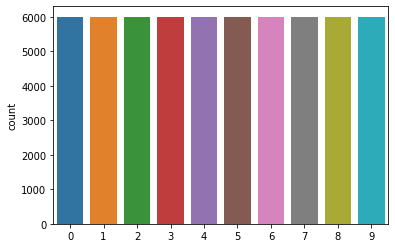

In [4]:
K = len(set(y_train))      ###### Number Of Labels
print(K)
sbn.countplot(y_train)

In [5]:
# Spliting X_train Set into training set and validation test
x_train, val_x, y_train, val_y = train_test_split(x_train, y_train, test_size=0.20)

## **3. Some Variables and Traps**

In [6]:
es = EarlyStopping(monitor='loss', patience=12)
filepath="/content/drive/My Drive/Colab Notebooks/Model/bestmodel.h5"
md = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [7]:
# Important Variables
epochs = 10
batch_size = 128
input_shape = (28, 28, 1)
adam = tf.keras.optimizers.Adam(0.001)

## **4. Building Model with Basic Functional API**

In [8]:


i = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)       

In [9]:
# Compiling Model
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Fit Model
History = model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs = epochs,
          validation_data = (val_x, val_y),
          callbacks = [es,md],
          shuffle= True
        )

Epoch 1/10
372/375 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.8393
Epoch 00001: loss improved from inf to 0.47447, saving model to /content/drive/My Drive/Colab Notebooks/Model/bestmodel.h5
375/375 [==============================] - 7s 19ms/step - loss: 0.4745 - accuracy: 0.8396 - val_loss: 1.9319 - val_accuracy: 0.3797
Epoch 2/10
372/375 [============================>.] - ETA: 0s - loss: 0.2677 - accuracy: 0.9003
Epoch 00002: loss improved from 0.47447 to 0.26764, saving model to /content/drive/My Drive/Colab Notebooks/Model/bestmodel.h5
375/375 [==============================] - 5s 14ms/step - loss: 0.2676 - accuracy: 0.9003 - val_loss: 0.2544 - val_accuracy: 0.9057
Epoch 3/10
371/375 [============================>.] - ETA: 0s - loss: 0.2210 - accuracy: 0.9200
Epoch 00003: loss improved from 0.26764 to 0.22131, saving model to /content/drive/My Drive/Colab Notebooks/Model/bestmodel.h5
375/375 [==============================] - 5s 13ms/step - loss: 0.2213 

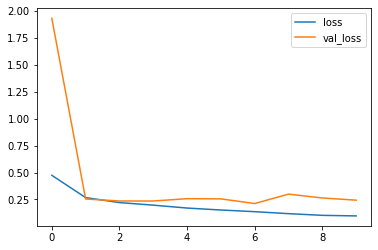

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label='val_loss')
plt.legend()

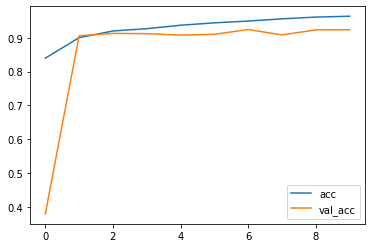

In [12]:
# Plot accuracy per iteration
plt.plot(History.history['accuracy'], label='acc')
plt.plot(History.history['val_accuracy'], label='val_acc')
plt.legend()

## **5. Loading Model and Making Prediction**

In [13]:
model1 = load_model(filepath)
model1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)       

[[860   1  13  16   0   0  94   0  16   0]
 [  0 992   0   5   0   0   1   0   2   0]
 [  7   1 910   8  13   0  58   0   3   0]
 [ 14  11   9 917  19   0  27   0   2   1]
 [  0   1  75  28 786   0 105   0   5   0]
 [  0   0   0   0   0 978   0  10   2  10]
 [ 86   3  55  23  35   0 782   0  16   0]
 [  0   0   0   0   0   7   0 961   0  32]
 [  1   1   1   7   0   1   0   1 988   0]
 [  0   0   1   0   0   4   0  19   0 976]]


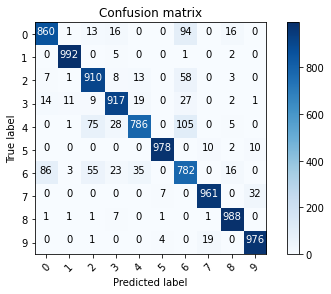

In [14]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model1.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))